Tổng hợp các trình tự một bài toán ML với dữ liệu thô
- Tiền Xử Lý Dữ Liệu
    - Kiểm tra dữ liệu
    - Viualization data
    - Missing Data
    - Encoding data
    - Features selection
- Xây dựng các thuật toán
    - Code pandas,numpys
    - Code theo thư viện
- Đánh giá kết quả
    - Accuracy
    - Matrix confusion
    - ROC-AUC
    - MSE

In [1]:
#Load thư viện liên quan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.feature_selection import SelectFromModel
from feature_engine.selection import DropDuplicateFeatures,DropConstantFeatures,RecursiveFeatureElimination,RecursiveFeatureAddition
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data = data.drop('Id',axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


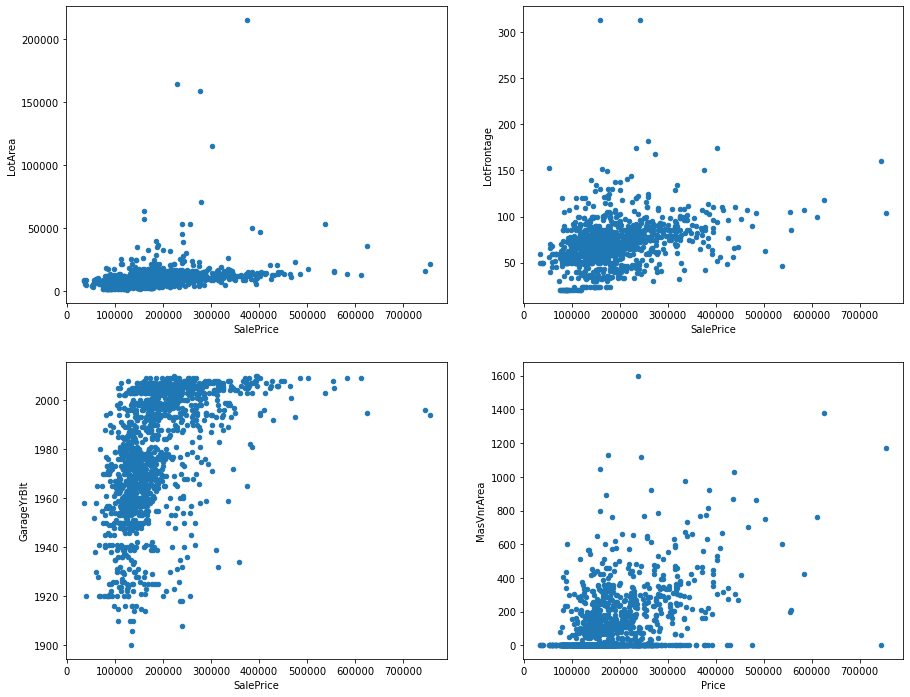

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
data.plot(kind = 'scatter',x = 'SalePrice',y = 'LotArea',ax = ax[0][0])
plt.xlabel('Price')
plt.ylabel('LotArea')
data.plot(kind = 'scatter',x = 'SalePrice',y = 'LotFrontage',ax = ax[0][1])
plt.xlabel('Price')
plt.ylabel('LotFrontage')
data.plot(kind = 'scatter',x = 'SalePrice',y = 'GarageYrBlt',ax = ax[1][0])
plt.xlabel('Price')
plt.ylabel('GarageYrBlt')
data.plot(kind = 'scatter',x = 'SalePrice',y = 'MasVnrArea',ax = ax[1][1])
plt.xlabel('Price')
plt.ylabel('MasVnrArea')
plt.show()

<AxesSubplot:>

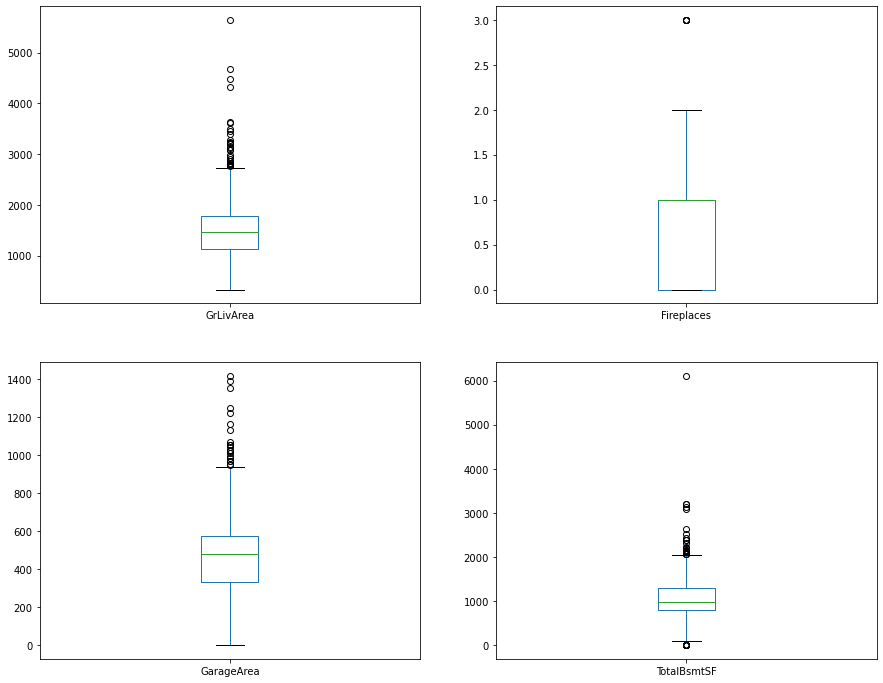

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
data['GrLivArea'].plot(kind = 'box',ax = ax[0][0])
data['Fireplaces'].plot(kind = 'box',ax = ax[0][1])
data['GarageArea'].plot(kind = 'box',ax = ax[1][0])
data['TotalBsmtSF'].plot(kind = 'box',ax = ax[1][1])

#### Missing Data

In [9]:
features_missing_colums = [var for var in data.columns if data[var].isnull().sum() > 0]

In [10]:
features_missing_colums

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
missing_data = data.isnull().sum().sort_values(ascending=False) /len(data)
missing_data=missing_data.drop(missing_data[missing_data == 0].index)
missing_data= pd.DataFrame({'missing_value':missing_data})
missing_data

,missing_value
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
FireplaceQu,0.472603
LotFrontage,0.177397
GarageYrBlt,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479


<AxesSubplot:>

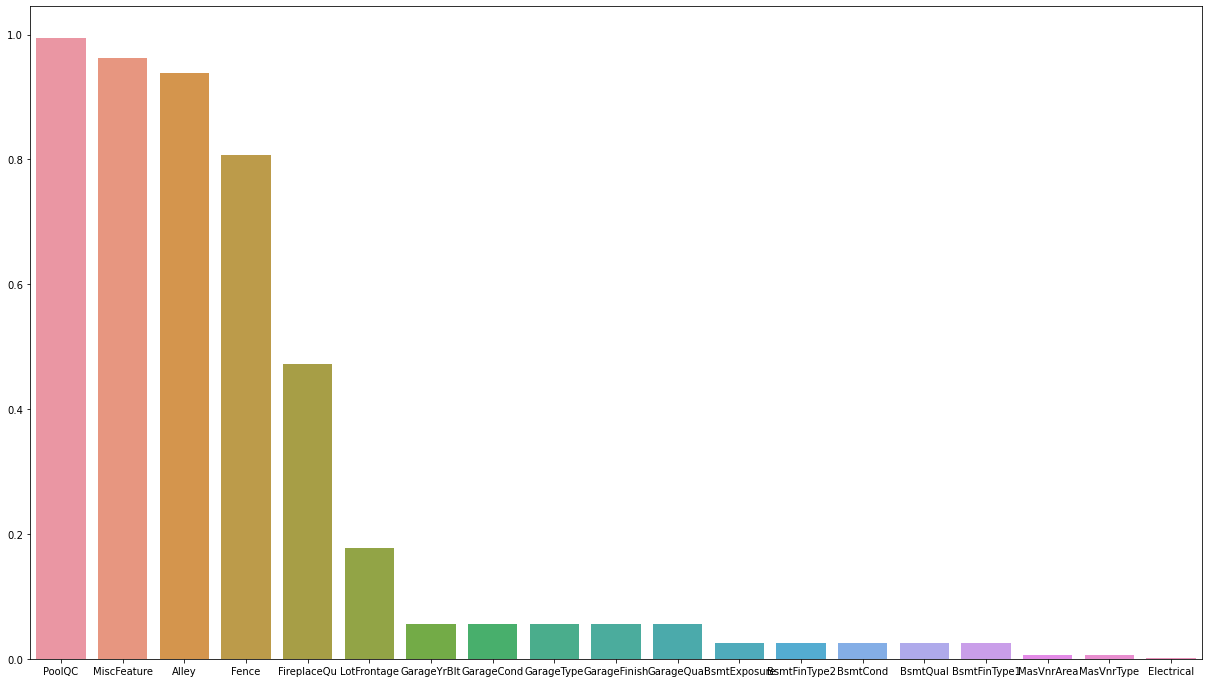

In [12]:
import seaborn as sns
plt.figure(figsize=(21,12))
sns.barplot(x = missing_data.index,y = missing_data['missing_value'].values)

In [13]:
for var in missing_data.index:
    print(var)
    print(data[var].unique())

PoolQC
[nan 'Ex' 'Fa' 'Gd']
MiscFeature
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley
[nan 'Grvl' 'Pave']
Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1

In [14]:
"""
Gán hạng mục sau:PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageCond,GarageType,GarageFinish,GarageQual thành "None" 
(Ta có thể thấy rằng tỷ lể khuyết quá lớn, gắn mode,ngẫu nhiên không hiệu quả)
"""
all_data_missing = data.copy()
all_data_missing['PoolQC'] = data['PoolQC'].fillna('None')
all_data_missing['MiscFeature'] = data['MiscFeature'].fillna('None')
all_data_missing['Alley'] = data['Alley'].fillna('None')
all_data_missing['Fence'] = data['Fence'].fillna('None')
all_data_missing['FireplaceQu'] = data['FireplaceQu'].fillna('None')
all_data_missing['GarageCond'] = data['GarageCond'].fillna('None')
all_data_missing['GarageType'] = data['GarageType'].fillna('None')
all_data_missing['GarageFinish'] = data['GarageFinish'].fillna('None')
all_data_missing['GarageQual'] = data['GarageQual'].fillna('None')

In [15]:
"""
Ta có thể thẩy LotFrontage và Neighborhood nó tương đương nhau ta có thể lấy giá trị trung bình
"""
all_data_missing['LotFrontage'] = data.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
"""
Các hạng mục sau: BsmtExposure,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinType1 ta có thể thấy tỷ khuyết khá thấp ta có thể gán
theo nhãn xuất hiện thường xuyên nhất
"""
features_colums = ['BsmtExposure','BsmtFinType2','BsmtCond','BsmtFinType1','MasVnrType','Electrical',
                   "BsmtQual",'Electrical']
sel = SimpleImputer(strategy='most_frequent')
all_data_missing[features_colums] = sel.fit_transform(data[features_colums])

In [18]:
"""
Các hạng mục sau: GarageYrBlt gán giá trị bất kỳ
"""
all_data_missing['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

In [19]:
median = data['MasVnrArea'].median()
all_data_missing['MasVnrArea'] = data['MasVnrArea'].fillna(median)

In [20]:
all_data_missing[features_missing_colums].isnull().mean()

LotFrontage     0.0
Alley           0.0
MasVnrType      0.0
MasVnrArea      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
FireplaceQu     0.0
GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
PoolQC          0.0
Fence           0.0
MiscFeature     0.0
dtype: float64

In [21]:
all_data_missing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2010,WD,Normal,142125


#### Encoding

In [22]:
categorical_cols = all_data_missing.columns[all_data_missing.dtypes == 'object']
number_cols = [col for col in all_data_missing.columns if all_data_missing[col].dtype=='int64' or all_data_missing[col].dtype=='float64'] 

In [23]:
X_train,X_test,y_train,y_test = train_test_split(all_data_missing.drop('SalePrice',axis = 1),data['SalePrice'],test_size=0.3,random_state=0)

In [24]:
#Mã hóa số nguyên theo mục tiêu
from feature_engine.encoding import OrdinalEncoder
variable_ord_ = ['MSZoning','Street','LotShape','LandContour','SaleType','BsmtQual','BsmtCond', 'ExterQual', 
'ExterCond', 'HeatingQC', 'KitchenQual', 'PoolQC','Condition1', 'Condition2','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
ord_ = OrdinalEncoder(encoding_method='arbitrary',variables=variable_ord_)
X_train = ord_.fit_transform(X_train)
X_test = ord_.fit_transform(X_test)

In [25]:
ord_.encoder_dict_

{'MSZoning': {'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4},
 'Street': {'Pave': 0, 'Grvl': 1},
 'LotShape': {'IR1': 0, 'Reg': 1, 'IR2': 2, 'IR3': 3},
 'LandContour': {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3},
 'SaleType': {'WD': 0,
  'New': 1,
  'ConLD': 2,
  'COD': 3,
  'CWD': 4,
  'Oth': 5,
  'ConLI': 6,
  'Con': 7},
 'BsmtQual': {'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3},
 'BsmtCond': {'TA': 0, 'Gd': 1, 'Fa': 2},
 'ExterQual': {'Gd': 0, 'TA': 1, 'Fa': 2, 'Ex': 3},
 'ExterCond': {'TA': 0, 'Gd': 1, 'Fa': 2, 'Ex': 3},
 'HeatingQC': {'TA': 0, 'Ex': 1, 'Fa': 2, 'Gd': 3},
 'KitchenQual': {'TA': 0, 'Fa': 1, 'Gd': 2, 'Ex': 3},
 'PoolQC': {'None': 0, 'Ex': 1, 'Fa': 2, 'Gd': 3},
 'Condition1': {'Norm': 0,
  'Artery': 1,
  'RRAn': 2,
  'Feedr': 3,
  'RRNn': 4,
  'PosN': 5,
  'RRAe': 6,
  'PosA': 7},
 'Condition2': {'Norm': 0,
  'RRAn': 1,
  'RRNn': 2,
  'Artery': 3,
  'Feedr': 4,
  'PosN': 5,
  'PosA': 6},
 'BsmtExposure': {'No': 0, 'Gd': 1, 'Av': 2, 'Mn': 3},
 'BsmtFinType1': {'Rec': 0, 'BLQ': 

In [26]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
64,60,0,70.0,9375,0,None,0,0,AllPub,Inside,...,0,0,0,GdPrv,None,0,2,2009,0,Normal
682,120,0,80.0,2887,0,None,0,1,AllPub,Inside,...,0,0,0,None,None,0,11,2008,0,Normal
960,20,0,50.0,7207,0,None,1,0,AllPub,Inside,...,0,0,0,None,None,0,2,2010,0,Normal
1384,50,0,60.0,9060,0,None,0,0,AllPub,Inside,...,0,0,0,MnPrv,None,0,10,2009,0,Normal
1100,30,0,60.0,8400,0,None,0,2,AllPub,Inside,...,0,0,0,None,None,0,1,2009,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,0,82.0,9430,0,None,0,0,AllPub,Inside,...,180,0,0,None,None,0,7,2009,0,Normal
835,20,0,60.0,9600,0,None,0,0,AllPub,Inside,...,0,0,0,None,None,0,2,2010,0,Normal
1216,90,1,68.0,8930,0,None,0,0,AllPub,Inside,...,0,0,0,None,None,0,4,2010,0,Normal
559,120,0,43.0,3196,0,None,0,0,AllPub,Inside,...,0,0,0,None,None,0,10,2006,0,Normal


In [27]:
variable_remaining = [var for var in X_train.columns if var not in variable_ord_]

In [28]:
categorical_cols = [col for col in variable_remaining if X_train[col].dtype == 'object']
number_cols = [col for col in variable_remaining if X_train[col].dtype=='int64' or X_train[col].dtype=='float64'] 

In [29]:
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [30]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=categorical_cols,  
    drop_last=True)

In [31]:
ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True,
              variables=['Alley', 'Utilities', 'LotConfig', 'LandSlope',
                         'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle',
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                         'Foundation', 'Heating', 'CentralAir', 'Electrical',
                         'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond',
                         'PavedDrive', 'Fence', 'MiscFeature',
                         'SaleCondition'])

In [32]:
ohe_enc.n_features_in_

79

In [33]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [34]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Condition1,Condition2,OverallQual,...,Fence_MnPrv,Fence_GdWo,MiscFeature_None,MiscFeature_Shed,MiscFeature_Gar2,SaleCondition_Normal,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand
64,60,0,70.0,9375,0,0,0,0,0,7,...,0,0,1,0,0,1,0,0,0,0
682,120,0,80.0,2887,0,0,1,0,0,6,...,0,0,1,0,0,1,0,0,0,0
960,20,0,50.0,7207,0,1,0,0,0,5,...,0,0,1,0,0,1,0,0,0,0
1384,50,0,60.0,9060,0,0,0,0,0,6,...,1,0,1,0,0,1,0,0,0,0
1100,30,0,60.0,8400,0,0,2,0,0,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,0,82.0,9430,0,0,0,0,0,8,...,0,0,1,0,0,1,0,0,0,0
835,20,0,60.0,9600,0,0,0,0,0,4,...,0,0,1,0,0,1,0,0,0,0
1216,90,1,68.0,8930,0,0,0,6,0,6,...,0,0,1,0,0,1,0,0,0,0
559,120,0,43.0,3196,0,0,0,0,0,7,...,0,0,1,0,0,1,0,0,0,0


In [35]:
X_train_drop = X_train.drop(number_cols,axis=1)
X_test_drop = X_test.drop(number_cols,axis=1)

In [36]:
X_train_drop

,MSZoning,Street,LotShape,LandContour,Condition1,Condition2,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Fence_MnPrv,Fence_GdWo,MiscFeature_None,MiscFeature_Shed,MiscFeature_Gar2,SaleCondition_Normal,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand
64,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
682,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
960,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
1384,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
1100,0,0,0,2,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
835,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1216,1,0,0,0,6,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
559,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


#### Scale Data

In [37]:
scale = StandardScaler()
data_scale_train = scale.fit_transform(X_train[number_cols])
data_scale_test = scale.fit_transform(X_test[number_cols])

In [38]:
t_dataframe = pd.DataFrame(data_scale_train,columns=number_cols)
te_dataframe =  pd.DataFrame(data_scale_test,columns=number_cols)

In [39]:
X_train_ = pd.DataFrame(np.concatenate([t_dataframe,X_train_drop],axis = 1),columns=X_train.columns)
X_test_ = pd.DataFrame(np.concatenate([te_dataframe,X_test_drop],axis = 1),columns=X_test.columns)

In [40]:
X_train_.shape,X_test_.shape

((1022, 197), (438, 197))

#### Select features

##### Lựa chon đặc trưng:  Xóa các Features trùng nhau, không thay đổi

In [41]:
dropfeatures = DropConstantFeatures(variables=None, missing_values='raise')
dropfeatures.fit(X_train_)

DropConstantFeatures()

In [42]:
dropfeatures.features_to_drop_

[]

In [43]:
dropfeatures.n_features_in_

197

In [44]:
dropfeatures = DropDuplicateFeatures(variables=None, missing_values='raise')
dropfeatures.fit(X_train_)

DropDuplicateFeatures(missing_values='raise')

In [45]:
dropfeatures.features_to_drop_

{'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'GarageCond_None',
 'GarageFinish_None',
 'GarageQual_None'}

In [46]:
dropfeatures.duplicated_feature_sets_

[{'Exterior1st_AsphShn', 'Exterior2nd_AsphShn'},
 {'Exterior1st_CBlock', 'Exterior2nd_CBlock'},
 {'GarageCond_None',
  'GarageFinish_None',
  'GarageQual_None',
  'GarageType_None'}]

In [47]:
X_train = dropfeatures.transform(X_train_)
X_test = dropfeatures.transform(X_test_)

In [48]:
X_train.shape,X_test.shape

((1022, 192), (438, 192))

##### Lựa chọn đặc trưng theo model Lasso

In [49]:
parameters = {'alpha':[0.01, 1, 10, 100]}
model = Lasso()
clf = GridSearchCV(model,parameters,scoring='r2')
clf.fit(X_train_,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140936923592.2673, tolerance: 500724925.9023501
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161605656159.92526, tolerance: 485030198.0440296
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179262893692.09973, tolerance: 458893202.3544333
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.01, 1, 10, 100]},
             scoring='r2')

In [50]:
clf.best_params_

{'alpha': 100}

In [51]:
model_lasso = SelectFromModel(Lasso(alpha=clf.best_params_['alpha'])).fit(X_train_,y_train)

In [52]:
selected_feat = X_train_.columns[(model_lasso.get_support())]
selected_feat 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Condition1', 'Condition2', 'OverallQual',
       'YearBuilt', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'SaleType',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LandSlope_Mod',
       'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_Sawyer',
       'Neighborhood_Crawfor', 'Neighborhood_NAmes', 'Neighborhood_Mitchel',
       'Neighborhood_Gilbert', 'Neighborhood_

In [53]:
X_train_lasso = X_train_[selected_feat]
X_test_lasso = X_test[selected_feat]

In [54]:
X_train_lasso.shape,X_test_lasso.shape

((1022, 94), (438, 94))

##### Lựa chọn đặc trưng theo phương pháp loại bỏ đặc trưng đệ quy

In [55]:
model = GradientBoostingRegressor(n_estimators = 10,max_depth=4,random_state=0)
sel = RecursiveFeatureElimination(
    estimator= model,
    scoring= 'r2',
    threshold = .001,
    cv = 5
    )
sel.fit(X_train_,y_train)

RecursiveFeatureElimination(cv=5,
                            estimator=GradientBoostingRegressor(max_depth=4,
                                                                n_estimators=10,
                                                                random_state=0),
                            scoring='r2', threshold=0.001)

<AxesSubplot:>

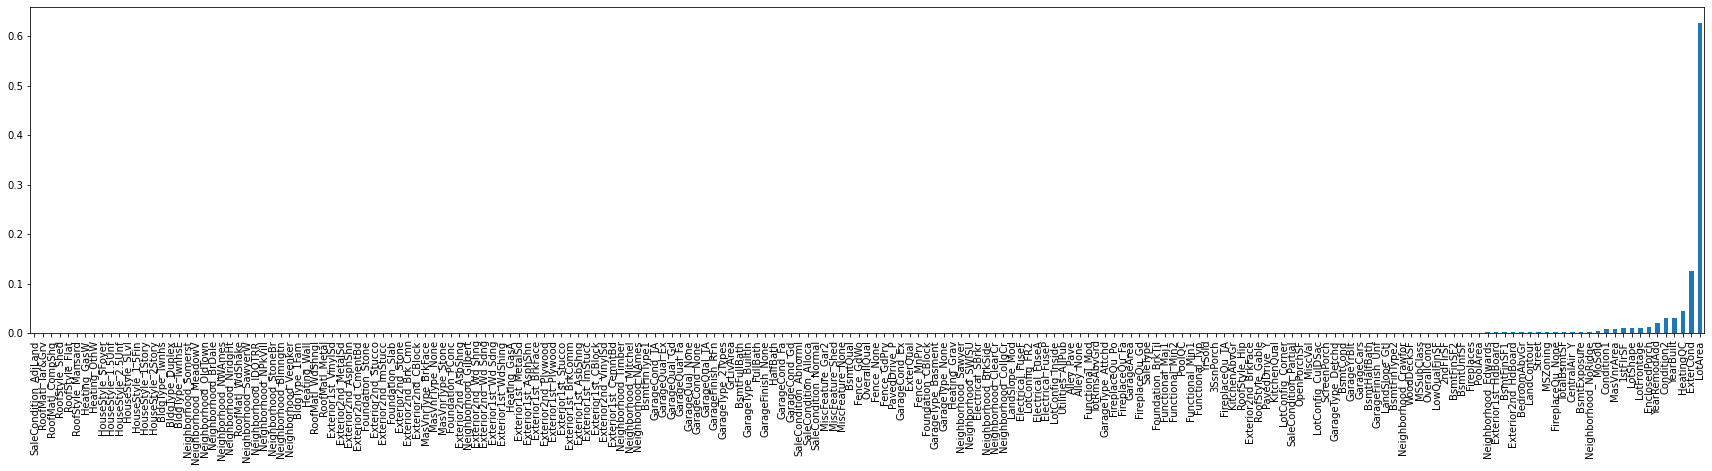

In [56]:
sel.feature_importances_.plot.bar(figsize=(30,6))

In [57]:
sel.features_to_drop_

['MSZoning',
 'BsmtFinSF1',
 'BsmtFinType2',
 '1stFlrSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'WoodDeckSF',
 'MiscVal',
 'Alley_Pave',
 'LandSlope_Gtl',
 'Neighborhood_NWAmes',
 'HouseStyle_SLvl',
 'RoofStyle_Hip',
 'Exterior2nd_HdBoard',
 'Exterior2nd_BrkFace',
 'Exterior2nd_Stucco',
 'Heating_GasA',
 'Heating_Wall',
 'Electrical_SBrkr',
 'Electrical_FuseP',
 'Functional_Min2',
 'GarageType_Attchd',
 'GarageFinish_RFn',
 'SaleCondition_Partial']

In [58]:
X_train_FeatureElimination = sel.transform(X_train_)
X_test_FeatureElimination = sel.transform(X_test_)

In [59]:
X_train_FeatureElimination.shape,X_test_FeatureElimination.shape

((1022, 172), (438, 172))

##### Lựa chọn đặc trưng bằng cách thêm đặc trưng đệ quy

In [60]:
model = GradientBoostingRegressor(n_estimators = 10,max_depth=2,random_state=10)
rfa = RecursiveFeatureAddition(
    estimator= model,
    scoring= 'r2',
    threshold = .001,
    cv = 5
    )
rfa.fit(X_train_,y_train)

RecursiveFeatureAddition(cv=5,
                         estimator=GradientBoostingRegressor(max_depth=2,
                                                             n_estimators=10,
                                                             random_state=10),
                         scoring='r2', threshold=0.001)

<AxesSubplot:>

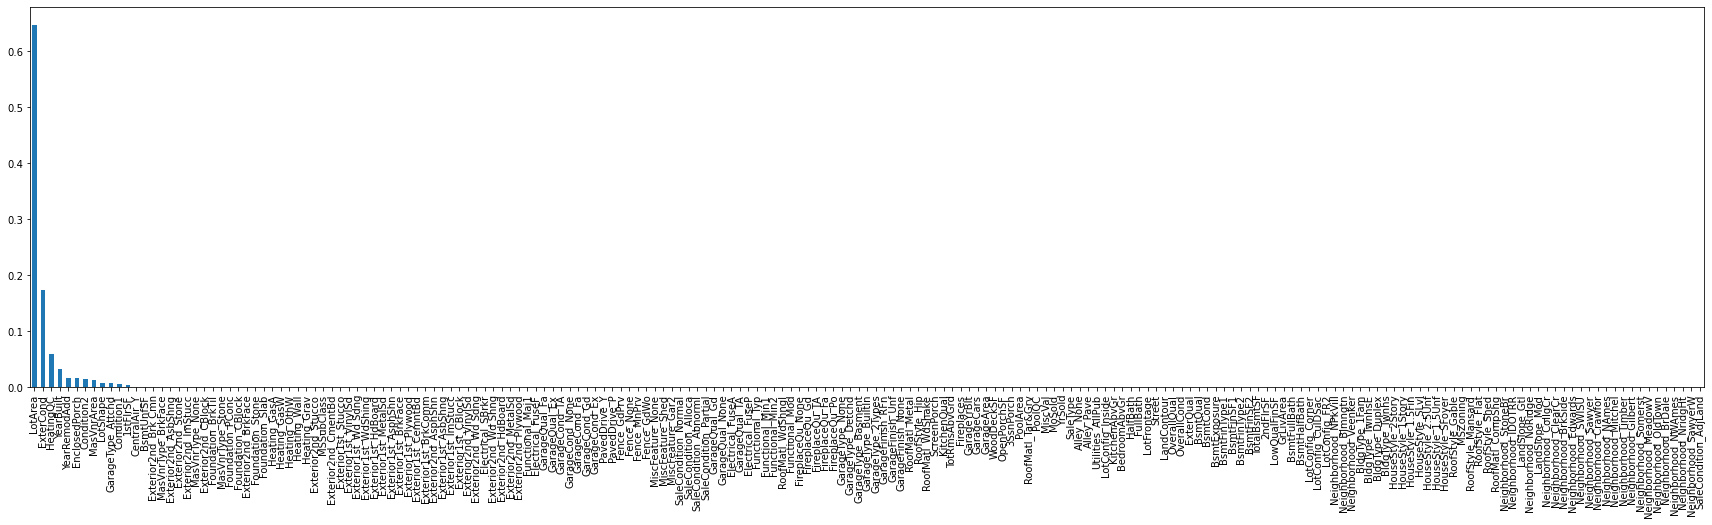

In [61]:
rfa.feature_importances_.plot.bar(figsize = (30,7))

<AxesSubplot:>

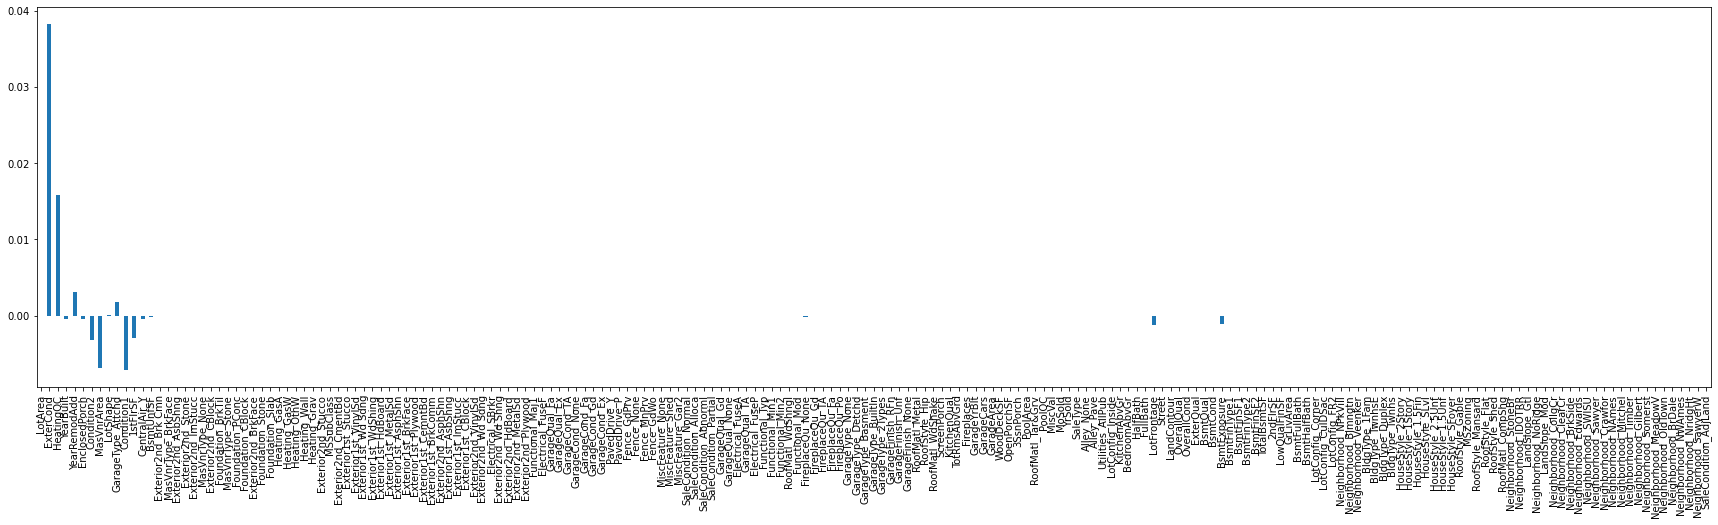

In [62]:
pd.Series(rfa.performance_drifts_).plot.bar(figsize = (30,7))

In [63]:
X_train_features_add = rfa.transform(X_train_)
X_test_features_add = rfa.transform(X_test_)

In [64]:
X_train_features_add

,LotArea,YearRemodAdd,ExterCond,HeatingQC,GarageType_Attchd
0,0.678402,-0.280153,0.988996,0.321398,1.0
1,-0.058396,0.345845,-0.446594,0.321398,1.0
2,-0.795194,-0.812519,-1.283217,-2.404485,0.0
3,-0.058396,-1.240552,-0.510355,-1.041544,0.0
4,-3.005590,-1.936105,-2.094722,-1.041544,0.0
...,...,...,...,...,...
1017,1.415201,0.284315,1.628539,1.684340,1.0
1018,-1.531993,-0.253401,-0.879397,0.321398,1.0
1019,-0.058396,0.418075,0.733952,0.321398,1.0
1020,0.678402,1.057449,0.067359,0.321398,1.0


In [65]:
X_train_features_add.shape,X_test_features_add.shape

((1022, 5), (438, 5))

### Triển khai mô hình

#### Linear Regression 

In [66]:
def get_numpy_array(X,y):
    one = np.ones((len(X),1))
    X = np.array(X)
    X_bar = np.concatenate((one,X),axis = 1)
    y = np.array(y)
    return X_bar,y

In [67]:
def predict(X,w):
    return X.dot(w)

In [68]:
def loss_function(X,y,w):
    y_predict = predict(X,w)
    total = y - y_predict
    return np.sum(total**2)

In [69]:
def feature_derivative(errors, feature):
    derivative = 2 * errors.dot(feature)
    return(derivative)

In [70]:
def update_weight(X,y,w,step_size,num_iters):
    costs = []
    for _ in range(num_iters):
        y_pr = predict(X,w)
        error = y_pr - y
        for i in range(len(w)):
            devivative = feature_derivative(error,X[:,i])
            w[i] = w[i] - step_size * devivative
        cost = loss_function(X,y,w)
        costs.append(cost)
    return w,costs

In [71]:
initialization_weights = np.zeros(X_train_lasso.shape[1] + 1)
num_iters = 100
step_size = 0.00001
X_train_lasso1,y_train1 = get_numpy_array(X_train_lasso,y_train)
X_test_lasso1,y_test1 = get_numpy_array(X_test_lasso,y_test)
weights,loss = update_weight(X_train_lasso1,y_train1,initialization_weights,step_size,num_iters)

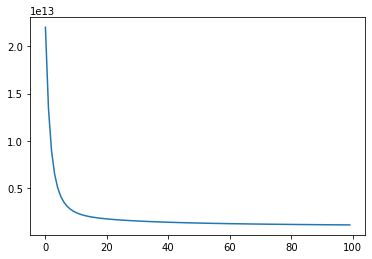

In [72]:
plt.plot(loss)

In [73]:
weights

array([ 2.19785823e+04, -5.44389759e+02,  1.43619839e+03,  1.93493307e+03,
        1.25711930e+04,  5.65282209e+03,  4.28742593e+03,  6.27615107e+03,
        7.19073054e+03,  1.00477418e+04, -1.48448508e+03,  8.74214135e+03,
        3.92185259e+03, -6.71409050e+02,  1.25229897e+04,  4.80775242e+03,
        2.52690789e+00,  5.89558374e+03,  2.86936299e+02, -1.62810352e+03,
       -2.73081846e+03,  5.51549718e+03,  6.23599105e+03, -1.09899945e+03,
        3.73064111e+03,  4.20616947e+03,  3.20545740e+03,  4.10063410e+02,
        6.17076513e+02,  1.07146190e+03,  1.60316479e+03,  9.81594402e+02,
        4.84053611e+02, -6.46726399e+02,  2.32867917e+03, -4.30199838e+02,
        7.56060824e+03,  5.31468847e+02, -1.76002432e+03, -1.33680638e+03,
        1.22005407e+04,  2.84648405e+03,  1.33310384e+04,  1.07317693e+03,
        5.60795395e+03,  4.53926541e+03,  2.10192434e+03,  6.01066279e+03,
        1.17192923e+04,  1.30268828e+03,  2.19668301e+03,  1.34241546e+02,
        1.31039306e+03,  

In [74]:
loss_function(X_test_lasso1,y_test,weights)

1121116804800.7937

In [75]:
predict(X_test_lasso1,weights)

array([183831.65342178, 117872.39345242,  93310.78214664, 206871.83383602,
        88744.26990678,  67779.94691779, 271238.30465413, 155932.89438735,
       475033.32542987, 188024.01644987, 228878.20056354, 120716.60393096,
       275109.95324004, 127092.92057975,  96034.91729486, 135677.43500666,
       267495.24238963, 143775.20418364, 143867.37829554, 211776.39952863,
       105499.21393701, 203241.80450054, 110359.69954804, 196410.40750591,
       195688.51833484, 221404.36932111, 192909.33027059,  62092.9928285 ,
       366123.33634199,  88987.10658567, 137308.44575052, 249599.85488482,
       177389.71665595, 330114.31695346, 309912.76658525, 237894.45446318,
       325597.06783956,  84877.32037835, 253940.76272944, 364032.95131087,
       229001.25266305,  67393.64112725, 233168.30688753, 321059.63772604,
       356187.29606872, 100536.14605369,  88262.36044704, 113784.6440799 ,
       174713.14147869, 108245.36330021, 414610.01926317, 145132.56051873,
       194748.51617697,  

In [76]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test1,predict(X_test_lasso1,weights))
print(r2)

0.6229738348502194


#### Ridge Regression

In [77]:
def loss_function_ridge(X,y,w,l2_penalty):
    return np.sum((y - predict(X,w))**2) + l2_penalty * np.sum(w**2)

In [78]:
def feature_devivative_ridge(X,w,lambdaa,error,flag):
    if flag == True:
        return 2* error.dot(X)
    return 2* error.dot(X) + 2 * lambdaa * w

In [79]:
def update_weights_ridge(X,y,w,step_size,num_iters,l2_penlaty):
    costs = []
    for _ in range(num_iters):
        y_pr = predict(X,w)
        error = y_pr - y
        for i in range(len(w)):
            if i == 0:
                devivative  = feature_devivative_ridge(X[:,i],w[i],l2_penlaty,error,True)
            else:
                devivative  = feature_devivative_ridge(X[:,i],w[i],l2_penlaty,error,False)
            w[i] = w[i] - step_size * devivative
        cost = loss_function_ridge(X,y,w,l2_penlaty)
        costs.append(cost)
    return w,costs

In [80]:
initialization_weights = np.zeros(X_train_lasso.shape[1] + 1)
num_iters = 100
step_size = 0.00001
l2_penalty = 0.000001
X_train_lasso2,y_train2 = get_numpy_array(X_train_lasso,y_train)
X_test_lasso2,y_test2 = get_numpy_array(X_test_lasso,y_test)
weights_ridge,loss_ridge = update_weights_ridge(X_train_lasso2,y_train2,initialization_weights,step_size,num_iters,l2_penalty)

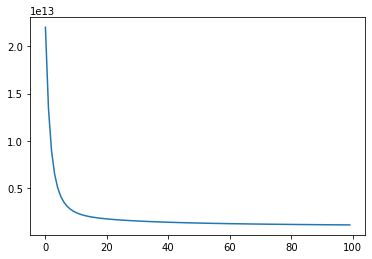

In [81]:
plt.plot(loss_ridge)

In [82]:
weights_ridge

array([ 2.19785824e+04, -5.44389759e+02,  1.43619839e+03,  1.93493307e+03,
        1.25711930e+04,  5.65282209e+03,  4.28742593e+03,  6.27615107e+03,
        7.19073054e+03,  1.00477418e+04, -1.48448508e+03,  8.74214135e+03,
        3.92185259e+03, -6.71409049e+02,  1.25229897e+04,  4.80775242e+03,
        2.52690790e+00,  5.89558374e+03,  2.86936301e+02, -1.62810351e+03,
       -2.73081846e+03,  5.51549718e+03,  6.23599105e+03, -1.09899945e+03,
        3.73064112e+03,  4.20616948e+03,  3.20545740e+03,  4.10063413e+02,
        6.17076512e+02,  1.07146190e+03,  1.60316479e+03,  9.81594402e+02,
        4.84053611e+02, -6.46726398e+02,  2.32867917e+03, -4.30199838e+02,
        7.56060824e+03,  5.31468848e+02, -1.76002432e+03, -1.33680638e+03,
        1.22005407e+04,  2.84648405e+03,  1.33310384e+04,  1.07317693e+03,
        5.60795395e+03,  4.53926541e+03,  2.10192434e+03,  6.01066279e+03,
        1.17192923e+04,  1.30268828e+03,  2.19668301e+03,  1.34241546e+02,
        1.31039306e+03,  

In [83]:
predict(X_test_lasso2,weights_ridge)

array([183831.65338511, 117872.39342695,  93310.78213828, 206871.83381406,
        88744.26990771,  67779.94693068, 271238.30466042, 155932.89437366,
       475033.32537984, 188024.01645399, 228878.20054935, 120716.60394373,
       275109.95321845, 127092.92060036,  96034.91728483, 135677.43496452,
       267495.24237659, 143775.20416931, 143867.37828532, 211776.39949813,
       105499.21392073, 203241.80450966, 110359.69956653, 196410.40749006,
       195688.51833422, 221404.36927655, 192909.33027533,  62092.99281313,
       366123.33631155,  88987.10656067, 137308.44576571, 249599.85486743,
       177389.71666427, 330114.31695081, 309912.76658113, 237894.45446355,
       325597.06781041,  84877.32038153, 253940.76271328, 364032.95128641,
       229001.25265253,  67393.64115035, 233168.30688874, 321059.63773247,
       356187.29604587, 100536.14608108,  88262.36045955, 113784.64408426,
       174713.14146753, 108245.3632896 , 414610.01923275, 145132.56051908,
       194748.51616898,  

In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test2,predict(X_test_lasso2,weights_ridge))
print(r2)

0.6229738349261693


##### Lasso Regression

In [85]:
def lasso_step(i, feature_matrix, output, weights, l1_penalty):
    # tính prediction
    prediction = predict(feature_matrix,weights)
    # tính ro[i] = SUM[ [feature_i]*(output - prediction + weight[i]*[feature_i]) ]
    ro_i =  np.sum(feature_matrix[:,i]@(output - prediction +  weights[i]*(feature_matrix[:,i])))

    if i == 0: # intercept -- không điều chuẩn
        new_weight_i = ro_i 
    elif ro_i < -l1_penalty/2.:
        new_weight_i = ro_i + (l1_penalty / 2)
    elif ro_i > l1_penalty/2.:
        new_weight_i = ro_i - (l1_penalty/2)
    else:
        new_weight_i = 0.
    
    return new_weight_i

In [86]:
def loss_function_lasso(X,y,w,l1_penalty):
    return np.sum((y - predict(X,w))**2) + l1_penalty * np.sum((w))

In [87]:
def update_weights_lasso(feature_matrix, output, initial_weights, l1_penalty, tolerance):
    m,n = feature_matrix.shape
    weights = np.array(initial_weights.copy())
    converged = False
    while not converged:
        change = []
        for i in range(n):
            old_weights_i = weights[i]
            weights[i] = lasso_step(i,feature_matrix,output,weights,l1_penalty)
            change_weight = abs(old_weights_i - weights[i])
            change.append(change_weight)
        if max(change) < tolerance:
            converged = True
    return weights

#### Sử dụng thư viện

In [124]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Sử dụng hồi quy tuyến tính

In [157]:
def LinearReg(X_train,y_train,X_test,y_test):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    print(lin_reg.predict(X_train.iloc[:5]))
    print(y_test[:5])
    print('Score:',lin_reg.score(X_test,y_test))

In [158]:
LinearReg(X_train_lasso,y_train,X_test_lasso,y_test)

[236246.04151349 163238.21868983 152888.1345742   97709.02196708
  44526.16643362]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score: 0.7252327673725035


In [161]:
LinearReg(X_train_FeatureElimination,y_train,X_test_FeatureElimination,y_test)

[243371.7382726  157232.70404766 145475.2234589   87390.57382267
  47900.92021842]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score: -1.3381237971096132e+23


In [162]:
LinearReg(X_train_features_add,y_train,X_test_features_add,y_test)

[228552.23499667 179480.85088554  79401.74135716 132824.30432092
 -11164.81411071]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score: 0.7200330173388876


#### Sử dụng DecisionTree

In [163]:
def decisiontree(X_train,y_train,X_test,y_test):
    model_tree = DecisionTreeRegressor(random_state=1)
    model_tree.fit(X_train,y_train)
    print(model_tree.predict(X_test.iloc[:5]))
    print(y_test[:5])
    print('Score:',model_tree.score(X_test,y_test))

In [164]:
decisiontree(X_train_lasso,y_train,X_test_lasso,y_test)

[188000. 152000. 104900. 236000. 113000.]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score: 0.7232364076200166


In [165]:
decisiontree(X_train_FeatureElimination,y_train,X_test_FeatureElimination,y_test)

[230000. 157900. 117000. 205000. 112000.]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score: 0.661696020105166


In [166]:
decisiontree(X_train_features_add,y_train,X_test_features_add,y_test)

[256000. 140000.  87000. 222500.  85000.]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score: 0.7108020807896055


#### Sử dụng RandomForestRegressor

In [167]:
def RandomForest(X_train,y_train,X_test,y_test):
    model_random = RandomForestRegressor()
    model_random.fit(X_train,y_train)
    print(model_random.predict(X_test.iloc[:5]))
    print(y_test[:5])
    print('Score',model_random.score(X_test,y_test))

In [168]:
RandomForest(X_train_lasso,y_train,X_test_lasso,y_test)

[211986.17 154939.42 104830.37 230803.68 109223.  ]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score 0.8479730686592779


In [169]:
RandomForest(X_train_FeatureElimination,y_train,X_test_FeatureElimination,y_test)

[224626.7  149090.   106967.5  230699.18 101938.  ]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score 0.8664340147643554


In [170]:
RandomForest(X_train_features_add,y_train,X_test_features_add,y_test)

[216324.8        145864.         110949.         226765.05
  89412.08166667]
529    200624
491    133000
459    110000
279    192000
655     88000
Name: SalePrice, dtype: int64
Score 0.8364330624877421


#### Đánh giá mô hình: Kiểm định chéo

In [181]:
from sklearn.model_selection import cross_val_score
def kford(model,X,y):
    kf = KFold(10, shuffle=True, random_state=0).get_n_splits(X.values)
    scores = cross_val_score(
        model, X, y,
    scoring="neg_mean_squared_error", cv=kf)
    rmse_scores = np.sqrt(-scores)
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())

##### Kiểm định chéo chọn 3 tập dữ liệu đc lọc qua 3 cách: Model: Linear Regression

In [182]:
kford(lin_reg,X_train_lasso,y_train)

Scores: [22759.3906924  46825.74365586 35052.22041897 20125.15092472
 23188.15322549 34167.69005725 19731.9142482  27359.96714231
 20279.36855821 20780.36427036]
Mean: 27026.996319376667
Standard deviation: 8519.675776064994


In [183]:
kford(lin_reg,X_train_FeatureElimination,y_train)

Scores: [2.23883316e+12 1.08771235e+16 8.54857433e+05 4.68855313e+12
 8.71681166e+13 1.00971182e+14 2.09833624e+04 2.44262105e+15
 2.07109120e+04 3.19260754e+04]
Mean: 1351481128103510.2
Standard deviation: 3256240503726463.0


In [184]:
kford(lin_reg,X_train_features_add,y_train)

Scores: [31561.02211786 49205.34128416 38419.15835635 31993.79505815
 36446.45672167 48359.36315756 32992.34323782 37921.77511642
 33282.84198068 29824.87064886]
Mean: 37000.69676795238
Standard deviation: 6458.956559010021


##### Kiểm định chéo chọn 3 tập dữ liệu đc lọc qua 3 cách: Model: DecisionTree

In [187]:
kford(model_tree,X_train_lasso,y_train)

Scores: [35423.70313499 53882.81944669 44701.33355174 40417.51077012
 39062.86503478 48987.33143085 36961.93458114 37435.27587901
 34909.94083549 32018.225225  ]
Mean: 40380.09398898024
Standard deviation: 6492.940298072709


In [188]:
kford(model_tree,X_train_FeatureElimination,y_train)

Scores: [36608.54531125 46383.99214943 34857.7385312  43251.97877022
 35517.08960459 69092.25523346 39545.11170951 45874.00037037
 34519.71114663 30865.35267139]
Mean: 41651.57754980492
Standard deviation: 10376.128407065726


In [189]:
kford(model_tree,X_train_features_add,y_train)

Scores: [34691.66913912 69708.84849581 40185.57045721 40550.45429735
 46081.36259054 69939.87117589 39465.78368173 39365.13437862
 34275.12663527 33522.45291247]
Mean: 44778.62737640076
Standard deviation: 13006.070834460743


##### Kiểm định chéo chọn 3 tập dữ liệu đc lọc qua 3 cách: Model: Randomforest

In [190]:
kford(model_random,X_train_lasso,y_train)

Scores: [24445.82211451 43520.53163322 31039.09590964 25685.94338086
 27028.52912557 37285.73882359 25325.33211734 26963.54234137
 23098.67530614 20764.3788218 ]
Mean: 28515.758957405324
Standard deviation: 6612.291305533348


In [191]:
kford(model_random,X_train_FeatureElimination,y_train)

Scores: [24001.8411502  45401.1556932  28868.67749633 24880.79385486
 26821.00695832 38232.42060216 25235.37693888 28056.71703809
 23436.88210032 21723.65443446]
Mean: 28665.85262668314
Standard deviation: 7062.501795398284


In [192]:
kford(model_random,X_train_features_add,y_train)

Scores: [29779.39360131 56776.89084046 31228.26613608 31881.10068952
 35250.80422165 48269.15890267 33282.2863767  32513.4968044
 27047.58669673 26153.85279279]
Mean: 35218.28370623101
Standard deviation: 9228.903803082087


Ta có thể rằng Thuật toán DecisionTree ko còn hiệu quả, và RandomForest đang làm rất tốt 

#### Tối ưu tham số

In [198]:
parameters = {'n_estimators':[0.5,1,100,1000]}
model_random_forest = RandomForestRegressor()
grid_search =  GridSearchCV(model_random_forest,parameters,cv = 10,scoring='neg_mean_squared_error')
grid_search.fit(X_train_FeatureElimination,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 129, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [            nan -1.91211487e+09 -8.82545182e+08 -8.61060133e+08]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [0.5, 1, 100, 1000]},
             scoring='neg_mean_squared_error')

In [199]:
grid_search.best_params_

{'n_estimators': 1000}

In [201]:
model_lasso = RandomForestRegressor(n_estimators=  grid_search.best_params_['n_estimators'], random_state = 0)
model_lasso.fit(X_train_lasso, y_train)
model_lasso.predict(X_test_lasso)

array([212063.567, 153691.517, 107671.491, 230120.715, 108614.986,
       112755.717, 264827.608, 140313.719, 499165.243, 157575.63 ,
       182546.897, 157251.586, 217692.004, 121245.823, 128133.146,
       149868.825, 223606.482, 115463.521, 146895.002, 182775.331,
       144167.245, 139451.169, 121688.393, 169414.857, 182663.564,
       219854.372, 168097.123,  87483.759, 329256.17 , 119770.042,
       158860.272, 195335.385, 139588.739, 292818.781, 336589.333,
       185349.684, 274754.912, 126972.018, 230336.145, 295974.954,
       207037.031, 133819.202, 179571.125, 283655.472, 334639.77 ,
       152662.559, 127795.026, 129106.342, 177490.931,  96164.927,
       380864.735, 148274.383, 167581.456,  96054.372, 233780.678,
       119067.467, 139564.449, 253615.787, 147739.217, 107763.74 ,
       143444.652, 137111.307, 147343.871, 155088.316, 186496.431,
       166171.969, 130239.936, 214428.464, 129847.614, 190734.189,
       183853.131, 121951.686,  91614.373, 231349.06 ,  97820.

In [204]:
r2_score(y_test,model_lasso.predict(X_test_lasso))

0.8498754199776057

In [205]:
model_lasso = RandomForestRegressor(n_estimators=  grid_search.best_params_['n_estimators'], random_state = 0)
model_lasso.fit(X_train_FeatureElimination, y_train)
model_lasso.predict(X_test_FeatureElimination)

array([220847.449     , 153997.709     , 105905.237     , 227652.643     ,
       107143.319     , 110174.844     , 263054.614     , 137456.998     ,
       510992.317     , 155396.351     , 195909.355     , 156668.433     ,
       224098.889     , 123097.389     , 131109.204     , 150487.712     ,
       219759.699     , 115577.375     , 145847.293     , 196230.403     ,
       140057.245     , 137418.968     , 111464.92      , 172537.259     ,
       181199.426     , 225375.706     , 165218.21      ,  93063.197     ,
       315298.396     , 117376.126     , 157629.908     , 199602.354     ,
       138224.687     , 289219.165     , 352422.58      , 184535.525     ,
       279527.592     , 127339.933     , 232980.665     , 301221.229     ,
       207142.869     , 135892.223     , 187827.92      , 285753.316     ,
       337128.069     , 151381.679     , 128471.81      , 129078.675     ,
       177857.064     , 103685.375     , 380814.095     , 147605.649     ,
       165621.941     ,  

In [206]:
r2_score(y_test,model_lasso.predict(X_test_FeatureElimination))

0.8599346290472698

In [207]:
model_lasso = RandomForestRegressor(n_estimators=  grid_search.best_params_['n_estimators'])
model_lasso.fit(X_train_features_add, y_train)
model_lasso.predict(X_test_features_add)

array([219695.62      , 146292.8       , 108405.22033333, 227238.739     ,
        89949.1335    , 113212.47233333, 246991.557     , 132370.728     ,
       631625.593     , 141639.41553333, 212264.03533333, 153122.27285714,
       232124.699     , 121204.55      , 116072.41666667, 133084.252     ,
       222992.664     ,  92236.45414286, 140895.035     , 202219.726     ,
       147578.896     , 137973.36146978, 127438.31461977, 171326.26666667,
       168962.35      , 215576.084     , 172713.525     ,  63257.211     ,
       320338.16933333, 107591.749     , 154676.86066667, 210574.35      ,
       135707.52475996, 297364.602     , 374877.094     , 184381.82716667,
       281396.996     , 133386.476     , 226660.562     , 296293.097     ,
       218395.612     , 139132.314     , 187101.228     , 278356.15      ,
       363272.854     , 140580.56390476, 128238.22446825, 118596.65933333,
       183100.7       , 108330.406     , 419261.919     , 153531.50916667,
       164699.46733333,  

In [208]:
r2_score(y_test,model_lasso.predict(X_test_features_add))

0.8344391080431935